# **Optimal intertemporal allocation of ressources**

Olivier Pannekoucke 
INPT-ENM / CNRM / CERFACS

<h3 style="font-variant:small-caps;"><center>Abstract</center></h3>

<div style="margin:0 50px 0 50px">
<div style="background:rgb(230,230,255)">

    
In this activity, we extend the Solow growth model by endogenizing consumption with intergenerational welfare, which is consistent with the Ramsey model.

After detailling the Ramsey model on a finite horizon time, a numerical exploration is proposed to asse the optimal path and its variations to economical parameters. This corresponds to a preliminary exploration of macroeconomics which helps to tackle more advanced integrated assessement model, as DICE, the model of Nordhaus, the nobel prize of economy 2018.
    
 </div>
<b>keywords</b>: <i> Ramsey model, endogenous consumption, welfare function, finite and infinite horizon time optimization</i>
</div>




## **Introduction**

**Background on Solow model of growth**

Solow model of growth represent an economy driven by the dynamics of the capital,$K$, for a population of size $L$ growing at a rate $n$. Accouting for depreciation of the capital at a rate $\delta$, the dynamics reads as 
\begin{equation}
(1)\qquad
\left\{\begin{array}{l}
 \dot K = s Y - \delta K,\\
 Y = A K^\alpha L^{1-\alpha},\\
\dot L = n L.
\end{array}\right.
\end{equation}
where $Y$ is the output of the economy which can be seen as the **Gross Domestic Product** (GDP) (PIB in French), explained here from the two factors of production $(K,L)$ following the production function $Y=F(K,L)=AK^\alpha L^{1-\alpha}$ a **Cobb-Douglas function** that is homogeneous of degree one $F(\lambda K,\lambda L)=\lambda  F(K,L)$.

Solow dynamics represent the return of capital that is due to investment $I$, which is equal to the saving $S$, which is exogenously modeled as a constant fraction of the GDP, $S=sY$. Since $Y=I+C$, where $C$ denotes the consumption, we obtain that $S=I=Y-C$ so it is possible to reformulate the dynamics of capital as 
$$\dot K = Y-C -\delta K.$$

Written in per capita values, dynamics of the capital per capita reads as 
$$(2)\qquad \dot k = f(k)-c -(\delta+n) k.$$
for $k=K/L$, $y=f(k)= A k^\alpha=F(k,1)$ where $y=Y/L$. 

Because of the exogenous modelling of the saving, the consumption is of course exogenously modeled from 
$$C=(1-s)Y.$$

Thus, nothing in Solow's model explains consumption, which should be explained by consumer preference.

**Organization of the notebook**

First we introduce the notion of utility that is a way to compare strategies of consumption in Section 1, and extend the utility function considering the consumption along the time under a finite then a continuous time period, leading to the welfare function. Section 2 introduces the Ramsey model with an endogenization of the consumption based on the welfare function, and solved from a numerical implementation of the command optimal. Readers explore the properties of the Ramsey model from numerical investigations that lead them to facilitate the introduction to the integrated assessement model DICE of Nordhaus (1922), which ends this introduction to the mitigation of climate change.

## **1. Explaining the consumption from the utility and welfare functions**

### **1.1 Consumption and utility**

**Utility as a measure of the consumption**

An utility function is a **concave function** that is introduced to quantify the amount of satisfaction to consume one or more goods.

For two goods, the utility $U(g_1,g_2)$ allows us to understand how the consumer can be indifferent to replacing one part of a good with another.




For a given set of goods $(g_1,g_2)$, the expression of the <b>marginal rate of substitutions (MRS)</b> which gives the increase of $g_2$ needed to compensate a decrease of $g_1$ without changing the level of satisfaction (that is $dU(g_1,g_2)=0$) reads as 
    $MRS_{2\leftarrow 1} = -\frac{\partial_{g_1}U}{\partial_{g_2}U}$
so that 
    $dg_2 = MRS_{2\leftarrow 1} dg_1$

**Example of the constant-elasticity utility : the constant relative risk aversion (CRRA) $u(c)=\frac{1}{1-\gamma}c^{1-\gamma}$ or $u(c)=\log c$ (when $\gamma=1$)**

The function $u(c)=\frac{1}{1-\gamma}c^{1-\gamma}$ is often introducted as a utility function (see Blanchard 1989, chap2) which show a **constant relative risk aversion (CRRA)**  where the **relative risk aversion** is defined for an arbitrary utility function as 
$$RRA = -\frac{c u''(c)}{u'(c)},$$
and is equation to $\gamma$ (so it is constant) in the case of the CRRA utility function.


In particular, the **elasticity consumption-utility**, defined by $\varepsilon_{cu} = \frac{dU/U}{dC/C}$, and **which represent the link between the relative variation of the utility to the relative variation of the consumption (or their percent of variations)**, is constant for this utility function.

**Comment** : elasticity is a common quantity in econometrics that relate percent of variation of many related quantities. As an example of interest, it has been introduce to differentiate consumer goods.

The elasticity $\varepsilon_{cu}$ is the constant $1-\gamma$ for  $u(c)=\frac{1}{1-\gamma}c^{1-\gamma}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def u(c, γ=2):
    if γ==1:
        return np.log(c)
    else:
        return np.power(c,1-γ)/(1-γ)

In [3]:
u(75000,γ=1)

11.225243392518447

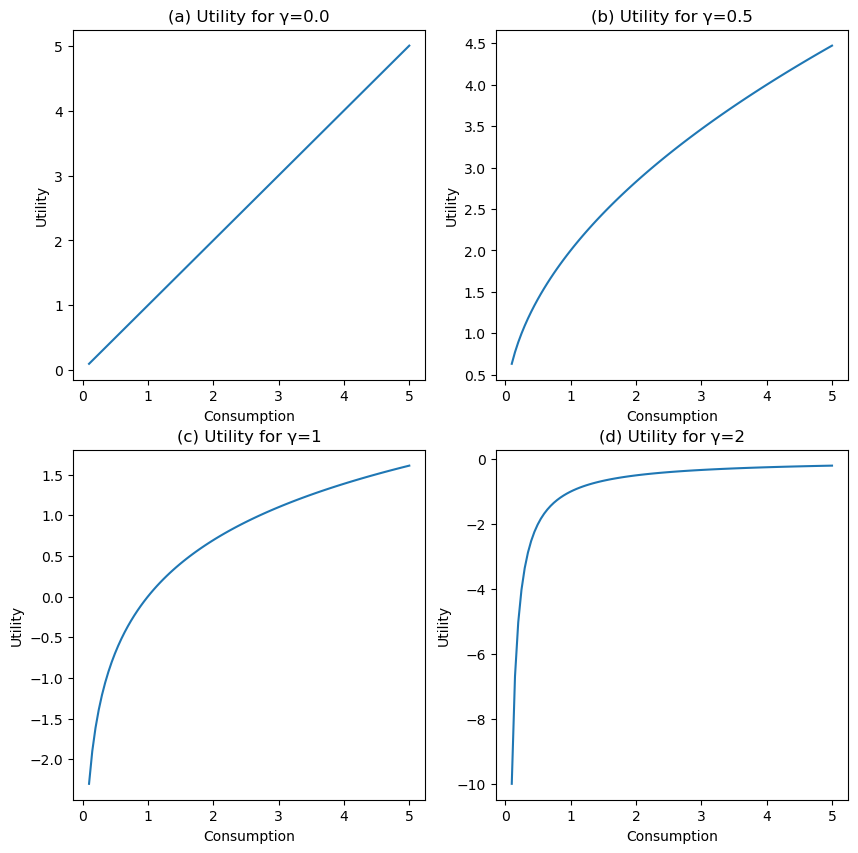

In [4]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
c = np.linspace(0.1,5,100)
for γ, ax, panel in zip([0., 0.5, 1, 2],axes.flatten(),'abcd'):
    ax.plot(c, u(c,γ))
    ax.set_xlabel('Consumption')
    ax.set_ylabel('Utility')
    ax.set_title(f'({panel}) Utility for γ={γ}')

### **1.2 Intertemporal utility function / Welfare function**

#### **1.2.1 Consumption preference for two times**

**Inter-temporal utility interpretation**

The level of satisfaction resulting from the consumption of the same good between two instants can be written as
$$W = u(c_0) + \beta u(c_1).$$
To interpret this relationship, we return to the framework of optimization. The objective is to maximize $W$:

 * If $\beta\ll 1$, then maximizing $W$ is mainly the same as maximizing $W= u(c_0)$, so the consumption that counts is that of the beginning of the period.
 * Conversely, if $\beta\gg 1$, then maximizing $W$ is equivalent to maximizing $W=u(c_1)$, and it is the consumption at the end of the period that is important.
 * Finally, when $\beta=1$, then the weight of the two contributions is the same and the consumption of each period plays an equal role.

**Relative contribution**

The optimization of $W$ being at a multiplicative (positive) or additive factor, constant, optimizing $W$ in two instants amounts to optimizing the function 
$$W = \frac{1}{1+\beta}u(c_0) + \frac{\beta}{1+\beta} u(c_1).$$
This shows that the weight of consumption at time $0$ counts as $\frac{1}{1+\beta}$ and that at $t=1$, $\frac{\beta}{1+\beta}$.


**Intertemporal marginal rate of substitution**

Let's return to the case of two moments, such that $W = u(c_0) + \beta u(c_1)$. For a consumption plane $c=(c_0,c_1)$, the indifference for $W$ to substitute for consumption $c+dc=(c_0+dc_0, c_1+dc_1)$ *i.e* such that $W(c)=W(c+dc)$ is written  
$$dW = \partial_{c_0} W dc_0 + \partial_{c_1} W dc_1=0,$$
leading to the substitution relation
$$dc_1 = -\frac{\partial_{c0}W}{\partial_{c1}W} dc_0,$$
which can be interpreted as follows:

***To keep the same level of satisfaction (utility/well-being), choosing to replace a unit of consumption at time $t_0$ *i.e.* $dc_0=-1$, amounts to increasing consumption at time $t_1$ by $dc_1=+\frac{\partial_{c0}W}{\partial_{c1}W}$***

This gives rise to the quantity, called the intertemporal substitution rate
$$MRS_{1\leftarrow 0}=\frac{\partial_{c0}W}{\partial_{c1}W}= \frac{1}{\beta}\frac{u'(c_0)}{u'(c_1)}.$$

**Numerical illustration**

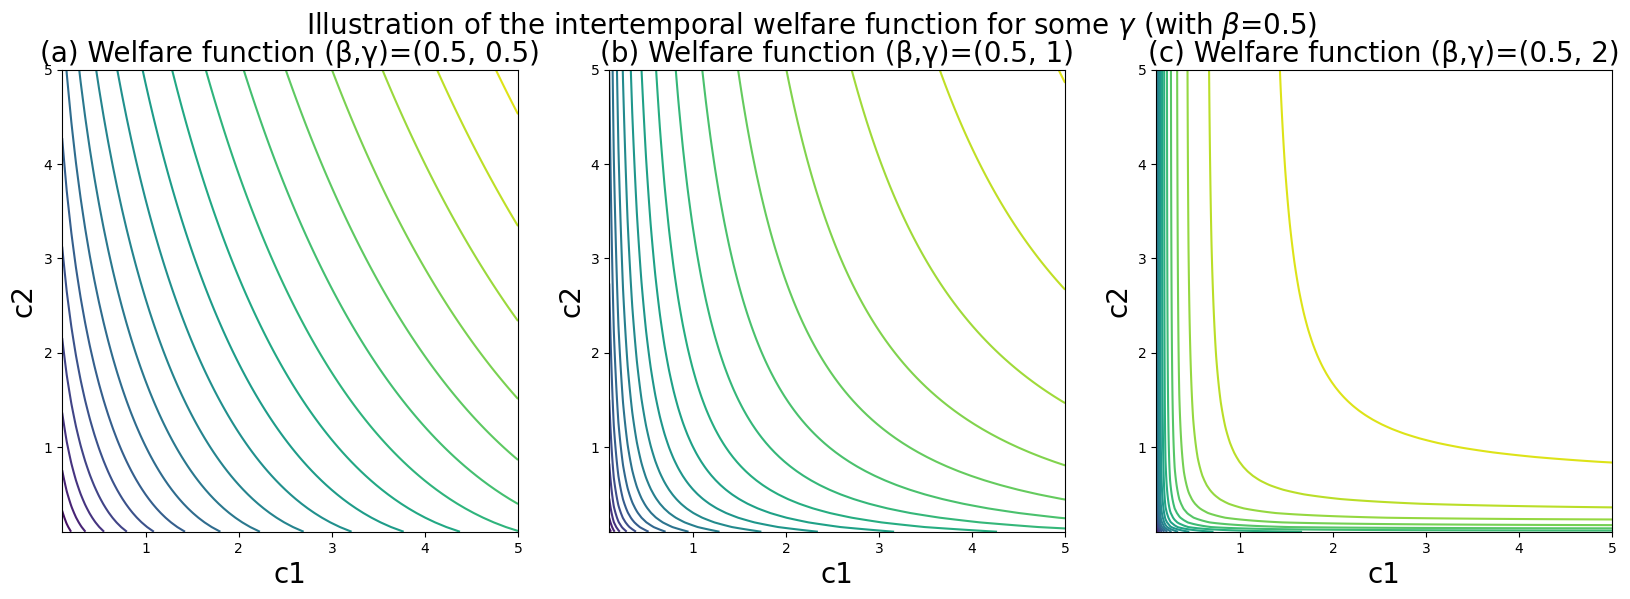

In [5]:
def W(c1,c2,β=0.95,γ=2): 
    """ Welfare function (or intertemporal utility function)"""
    return u(c1,γ)+β*u(c2,γ)

β = 0.5
fig, axes = plt.subplots(1,3,figsize=(20,6))

[C1,C2] = np.meshgrid(c,c)

for γ, ax, panel in zip([0.5, 1, 2],axes,'abc'):
    ax.contour(c,c,W(C1,C2,β=β, γ=γ),20)
    ax.set_xlabel('c1', fontsize=20)
    ax.set_ylabel('c2', fontsize=20)
    ax.set_title(f'({panel}) Welfare function (β,γ)={β,γ}', fontsize=20)
fig.suptitle(f"Illustration of the intertemporal welfare function for some $\gamma$ (with $\\beta$={β})", fontsize=20);

In [6]:
# Consumption between two instants
(
    W(2., 1., β=0.5),  # Consume 2 units at t_1, and 1 unit at t_2
    W(1., 2., β=0.5),  # Consume 1 units at t_1, and 2 unit at t_2
)

(-1.0, -1.25)

**Conclusion:** with $\beta=0.5$ we give a preference to consume in period $1$ compared to period $2$: $W(2,1)>W(1,2)$

#### **1.2.2 Intertemporal welfare function**

**Inter-temporal relative contribution: stationarity of relative weights between two consecutive moments**

To extend the welfare function to several moments, we can consider it as a sum weighted by the powers of $\beta$, which then allows us to compare the different periods with an equivalent ratio. 

Let us consider three moments, then $$W = u(c_0) + \beta u(c_1)+ \beta^2 u(c_2).$$

Thus, if we wish to fix the consumption level $c_0$, then this is no longer a quantity that should be part of the optimization; and the optimization problem amounts to optimizing 
$\tilde{W}=\beta u(c_1)+\beta^2 u(c_2)$, which is itself equivalent to optimizing 
$$\tilde{W}=u(c_1)+\beta u(c_2).$$

This shows that the comparison between the periods is finally always the same, despite the appearance of the formulation of $W$ to crush the contribution of future consumption. **From this point of view, the $W$ function presents a form of time invariance**.

**Welfare function over an arbitrary period**

Il en résulte que la fonction de bien-être pour une période $Q$ peut s'écrire comme 
$$
W = \sum_{q=0}^Q u(c_q) \beta^q  
$$


The continuous formulation of the walfare function reads as $$W = \int_0^T u(c) e^{-\theta t }dt,$$
where $\beta\sim e^{-\theta\delta t}\sim \frac{1}{1+\theta\delta t}$ and $c(t)$ is the consumption.

#### **1.2.3 From an individu to the population**

**The utility of two individuals is identical in their choice of consumption**

What happens if we consider the utility of two identical individuals in their choice of consumption?

 If $u_i$ denotes the utility for individual $i$, we can construct a utility for both such that $$U(c_1,c_2) = u_1(c_1)+u_2(c_2),$$ with $c_i$ the consumption choice for individual $i$.

Thus, in the case where the two individuals are indistinguishable in their consumption choices, it follows that $$u_1=u_2=u,$$ such that utility is given by $$U(c_1,c_2) = u(c_1)+u(c_2).$$.

Furthermore, since individuals are indistinguishable in their consumption choices, we can model their individual consumption as identical to each other, which leads to $c_1=c_2=c$. 

If we denote aggregate consumption by $C=c_1+c_2$, then $C = 2c$, such that the utility of the two individuals is written as follows $$U(C,2) = 2u\left(\frac{C}{2}\right).$$

**Utility of $L$ individuals with identical consumption choices**

The previous reasoning can be extended identically to the case of a group of $L$ individuals with the same consumption choices, such that the utility of the group is written $$U(c_1,\cdots, c_L)=\sum_{i=1}^L u_i(c_i) = \sum_{i=1}^L u(c_i) = \sum_{i=1}^L u\left( \frac{C}{L}\right) = L u\left( \frac{C}{L}\right) = U(C, L),$$ from which we retain the final expression $$U(C,L) = L u\left(\frac{C}{L}\right). $$

#### **1.2.4 Intertemporal welfare function for a growing population**

If we combine the intertemporal welfare using the utility of a population of $L(t)$ identical individuals in their choice of consumption at time $t$, then the resulting welfare is given by 
$$
W = \sum_{q=0}^Q U\left(C(t),L(t)\right) \beta^q = \sum_{q=0}^Q L(t)\, u\left(\frac{C(t)}{L(t)}\right) \beta^q.
$$

For a continuously growing population at a constant rate $n$, with $L(t)=L_0 e^{nt}$, this reads as $$W = L_0\int_0^T u(c) e^{(n-\theta) t }dt,$$ where the intial population size $L_0$ that does not inluence the optimisation can be dropped. 

## **2. Optimal consumption path: the Ramsey model / The social planner picture**

### **2.1 Optimal path formulation**

Ramsey model explains the consumption by solving the following the optimization problem

$$(3)\qquad c = \textrm{ArgMax}\, W= \int_0^T u(c) e^{-\theta t }dt \text{ , subject to the dynamics of the capital } \dot k = f(k)-c -(\delta+n) k, \text{ with } k_0(0)=k_0, k(t)\geq 0 \text{ and } c(t)\geq 0.$$

where $f(k)= A k^\alpha$ is the GDP per capita, and with $u(c)=\frac{c^{1-\gamma}}{1-\gamma}$ for numerical applications.

In this framework, $\gamma$ is **the rate of inequality aversion**. When $\gamma=0$, then $u$ is linear and the futur consumption is not important for the present consumption. When $\gamma>0$, there is an aversion to inequality because the utility is concave $u''<0$.

**Reformulation by introduction a consumption rate $\tilde c\in[0,1]$**

In order to use an optimizer that allows to control the value of $c$, the formulation as it is presented is complicated: indeed, $c$ has apparently no upper bound.

We can therefore reformulate the problem as a consumption rate, such that this time $c(t)=\tilde c(t) f[k(t)]$ with $\tilde c\in[0,1]$, which leads to writing the welfare as 
$$W = \int_0^T u(\tilde c f(k)) e^{-(\rho-n) t }dt,$$

### **2.2 Numerical code**

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
try:
    import eco4weather
except: 
    %pip install eco4weather
    import eco4weather

In [9]:
import eco4weather

class Ramsey(eco4weather.SocialPlanner):
    '''
    Economical model that represent
    '''
    
    def __init__(self, *args, γ=2., ρ=0.015, α=0.33, δ=0.1, n=0.01, β=None,**kwargs):        
        super().__init__(*args, **kwargs)        
        self.γ = γ  # Elasticity of intertemporal substitution  / γ = 2 / 
                    # Rate of inequality aversion
        self.δ = δ  # Depreciation rate of the capital          / δ = 0.1 /  
        self.ρ = ρ  # Discount rate for intertemporal utility   / ρ = 0.015 / 
        self.α = α  # Elasticity GDP/Capital in the Cobb-Douglas GDP / α = 0.33 / 
        self.A = 1. # Total productivity factor, that is the technology/innovation / A=1 / 
        self.n = n  # Population growth rate        
        self.β = np.exp(-(self.ρ-self.n)*self.dt) if β is None else β # is the discount factor  / β = 0.95 
        
    def f(self, k):
        """
        Growth Domestic Production (PIB in french)
        """
        return self.A * np.power(k,self.α) 
                                         
    def u(self,c):
        """
        Utility function
        """
        γ = self.γ
        if γ==1.:
            return np.log(c)
        else:
            return np.power(c,1.-γ)/(1.-γ)
        
    def u_prime(self,c):
        h = 1e-7
        return np.imag(self.u(c+1j*h)/h)         

    def trend(self, t, state):
        k = state
        y = self.f(k)
        investment = y*(1-self.control(t))
        return investment-(self.δ+self.n)*k

    
    def societal_utility(self, control, traj):
        '''
        c : compstion rate (1-c) being the saving rate.
        k : capital per person.
        '''
        c = control
        k = traj
        consumption = c*self.f(k)        
        return np.sum(self.u(consumption)*np.power(self.β,self.time_window) )
        
    @property
    def k_max(self):
        ''' Maximum value for which the consumption is non-negative '''
        return (self.A/(self.n+self.δ))**(1/(1-self.α))

    @property
    def k_star(self):
        ''' Equilibrium value for the captial per head '''
        return (self.α*self.A/(self.ρ+self.δ))**(1/(1-self.α))
    
    @property    
    def c_star(self):
        ''' Equilibrium value for the consumption per head '''
        return self.f(self.k_star)-(self.n+self.δ)*self.k_star        
        
    def plot_traj(self, k0=None, c=None):
        '''
        k0 : initial capital value
        c  : plan of consumption rate that ranges within [0,1]
        Optimal traj is plot when optimization has been conducted and c=None
        '''        
        if c is None:
            c = self.opt_control
        if k0 is None:
            k0 = self.opt_traj[0]
            
        k = self.predict(k0, c)
        fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
        ax1.plot(self.time_window, k)
        ax1.plot(self.time_window[[0,-1]], 2*[self.k_star],'r--',label='Equilibrium val. $k^\\star$')
        ax1.set_xlabel('time')
        ax1.set_title('(a) Captial per head')        
        ax1.legend()
        ax2.plot(self.time_window, c)
        ax2.plot(self.time_window[[0,-1]], 2*[self.c_star/self.f(self.k_star)],'r--',label='Equilibrium val. $c^\\star$ ratio')
        ax2.legend()
        ax2.set_xlabel('time')
        ax2.set_title('(b) Consumption rate (in $[0,1]$)')
        
            
    def plot_phase_plan(self):
        k = np.linspace(0,self.k_max,200)        
        # locus \dot k = 0:
        plt.plot(k, self.f(k)-(self.n+self.δ)*k,label='locus $\\dot k = 0$')
        # locus \doc c = 0
        plt.plot(2*[self.k_star],[0,2],label='locus $\\dot c = 0$')
        # Equilibrium
        plt.plot(self.k_star, self.c_star,'b.',label='Equilibium $(k^\\ast,c^\\ast)$')
        plt.xlabel('Capital per head (k or $K/L$)')
        plt.ylabel('Consumption per head (c or $C/L$)')
        plt.legend()    

    def plot_opt_traj(self):    
        '''
        Plot the optimal trajectory in the phase plan
        '''
        self.plot_phase_plan()
        c = self.opt_control
        k = self.predict(k0, c)
        plt.plot(k[0], c[0]*self.f(k[0]),'r.', label='Opt. init. cond.')        
        plt.plot(k, c*self.f(k),'--', color='orange', label='Opt. path')
        plt.legend()
        plt.title('Optimal (k,c) path in the phase plan')


### **2.3 Illustration of the computation of an optimal path**

In [10]:
econ = Ramsey(nbyears=300, time_scheme='euler', dt=1)

Time scheme is Euler for Econ studies, with time step dt of 1.0 yr, over 300 years


**Example of the calculation of the welfare function (W) in the case of a consumption plan of 20% of GDP**

In [11]:
c = np.zeros(econ.ndt)
c[:] = 0.2
k0 = 1.2
econ.objfunc(c, state0=k0)

312.1791074534558

**Optimization of consumption for a given initial GDP**

In [12]:
k0=1.
econ.optimize(state0=k0, bound=1., initial_control=c)

/tmp/ipykernel_38709/2601667624.py:33: RuntimeWarning: divide by zero encountered in power
  return np.power(c,1.-γ)/(1.-γ)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 140.3872584717663
            Iterations: 30
            Function evaluations: 9087
            Gradient evaluations: 30


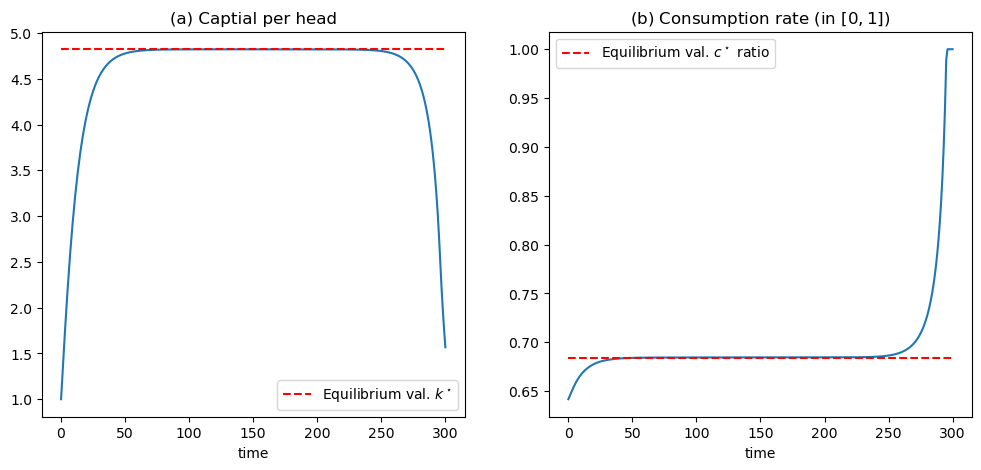

In [13]:
econ.plot_traj()

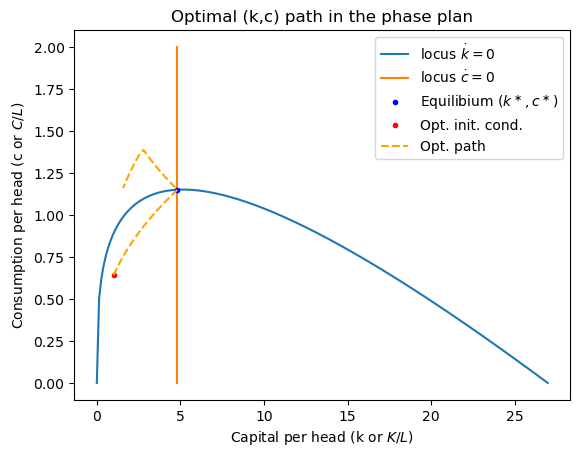

In [14]:
econ.plot_opt_traj()

In [15]:
# Optimal value from the numerical optimization versus theoretical ones
print(f'Maximum of capital reached over the period: {econ.opt_traj.max():0.5} (versus theoretical value ~{econ.k_star:0.3})')
idx_k_max = econ.opt_traj.argmax()
k_max = econ.opt_traj.max()
c_max = econ.opt_control[idx_k_max]
print(f'Maximum of consumption ratio reached over the period: {c_max:0.5} (versus theoretical value ~{econ.c_star/econ.f(econ.k_star):0.3})')

# Optimal value

Maximum of capital reached over the period: 4.8222 (versus theoretical value ~4.82)
Maximum of consumption ratio reached over the period: 0.68438 (versus theoretical value ~0.684)


## Conclusion 

This notebook shown how Ramsey model can be used to make the consumption endogenous while it is exogenous in Solow model.
Numerical solution has been introduced to illustrate the optimization process.

**Perspectives**

  The welfare function can be used to combine economy and climate change, leading to what is called an Integrated Assessement Model (IAM).
  
  One of the first well known IAM -- Dynamic Integrated model of Climate and the Economy (DICE) -- has been introduced by William Nordhaus in the 90' and it has been used to evaluate the cost of carbon tax that would be needed to mitigate the climate change. W. Nordhaus receive the Nobel price for its contribution to the mitigation in climate change.
  
  In the next activity, we introduce a simplified IAM and show how carbon tax can be deduced from maximiazation of the welfare when considering a simple coupling between economy and climate change.

## **References**

 * R. M. Solow, “A Contribution to the Theory of Economic Growth,” The Quarterly Journal of Economics, vol. 70, no. 1, p. 65, Feb. 1956, doi: 10.2307/1884513.
 * F. P. Ramsey, “A Mathematical Theory of Saving,” The Economic Journal, vol. 38, no. 152, p. 543, Dec. 1928, doi: 10.2307/2224098.
 * W. D. Nordhaus, “An Optimal Transition Path for Controlling Greenhouse Gases,” Science, vol. 258, no. 5086, pp. 1315–1319, 1992, Accessed: 2022-07-20. [Online]. Available: http://www.jstor.org/stable/2880417
 * Nobel prize of Economy 2018 scientific background, [“Economic Growth, Technological Change, And Climate Change: Scientific Background.” 2018.](https://www.nobelprize.org/uploads/2018/10/advanced-economicsciencesprize2018.pdf)

## **Appendix**

### **A. Connection with Solow model**

**Comparison with Solow (constant consumption plan and without consumption optimization)**

Example of a simulation in which consumption represents 20% of GDP, i.e. a constant investment of 80% of GDP.
In this case, the model works like a Solow model with the savings rate s=1-c= 0.8.

In particular, we expect the economy to converge to an equilibrium ($k=0$) given by  
$$k_\infty= \left(\frac{sA}{n+\delta}\right)^{\frac{1}{1-\alpha}}.$$

In [16]:
# Equilibrium from Solow model:
s = 1-0.2
k_inf_Solow = (s*econ.A/(econ.n+econ.δ))**(1/(1-econ.α))
print(k_inf_Solow)
# Ramsey evolution of the capital for the consumption strategy at rate c=0.2
c = np.zeros(econ.nbyears+1)
c[:] = 0.2

econ.predict(state0=1.0,control=c)

19.324816372365234


array([ 1.        ,  1.69      ,  2.45534547,  3.26129432,  4.08425589,
        4.90777922,  5.72025151,  6.51347374,  7.28172397,  8.02111222,
        8.72912043,  9.40426542, 10.0458471 , 10.65375734, 11.22833326,
       11.77024363, 12.28040038, 12.75988938, 13.20991626, 13.63176389,
       14.0267592 , 14.39624728, 14.74157137, 15.06405749, 15.36500281,
       15.64566705, 15.9072662 , 16.15096819, 16.37789013, 16.58909667,
       16.78559936, 16.96835678, 17.13827518, 17.29620965, 17.44296555,
       17.57930023, 17.70592487, 17.82350649, 17.93266998, 18.03400022,
       18.12804406, 18.21531248, 18.29628254, 18.37139934, 18.44107792,
       18.50570509, 18.56564113, 18.62122153, 18.67275848, 18.72054245,
       18.76484358, 18.80591301, 18.84398417, 18.87927397, 18.9119839 ,
       18.94230111, 18.97039939, 18.99644006, 19.02057289, 19.04293687,
       19.06366098, 19.08286489, 19.10065962, 19.11714814, 19.13242599,
       19.14658174, 19.15969754, 19.17184956, 19.18310842, 19.19

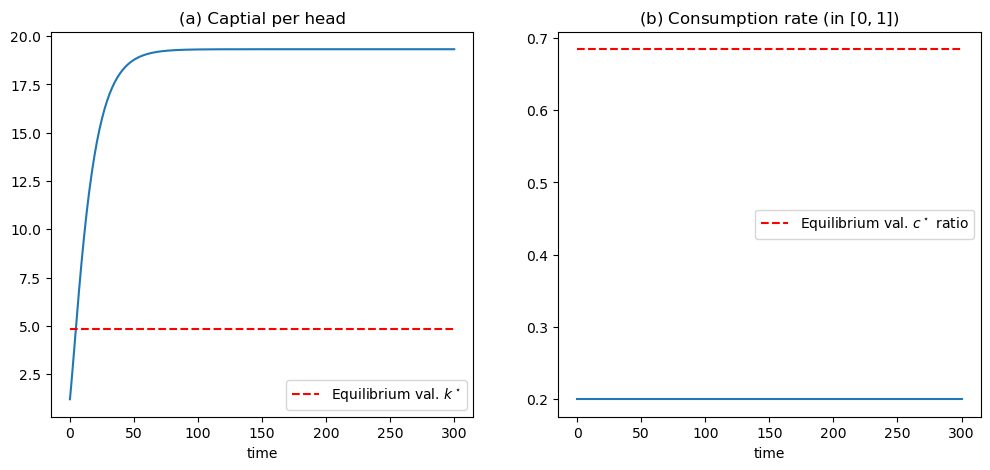

In [17]:
econ.plot_traj(k0=1.2, c=c)

**Conclusion**

In this particular case, where we choose a consumption path set at 20% of GDP, we find that the economy converges towards an equilibrium corresponding to that of the Solow model.

### **B. Validation of the optimal path**

Optimality of the path means that for any perturbation of the consumption trajectory, even small, the value of the welfare function will be larger than the one of the optimal path.

The following cell evaluates the optimality by adding noises of different magnitude to the optimal path, and evaluate the welfare function. 

143.0210149188544 >  140.3872584717663 (optimal)
140.4151196227273 >  140.3872584717663 (optimal)
140.38761962635863 >  140.3872584717663 (optimal)


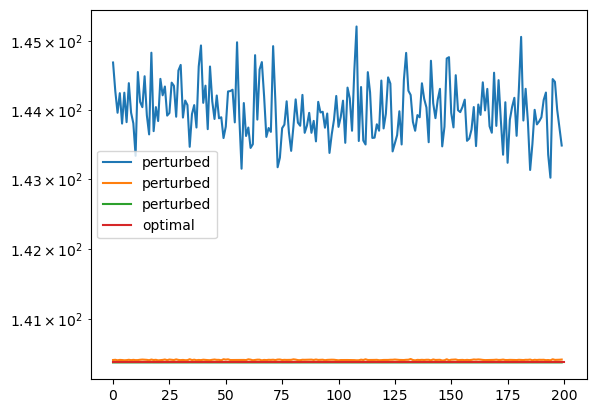

In [18]:
c_opt = econ.opt_control
W_opt = econ.objfunc(c_opt,k0)

for magnitude in [0.1, 0.01, 0.001]:
    W = []
    for _ in range(200):
        perturbation = np.random.normal(size=econ.nbyears+1)*magnitude

        perturbation[c_opt==1] = -np.abs(perturbation[c_opt==1])
        perturbation[c_opt==0] = +np.abs(perturbation[c_opt==0])

        c = econ.opt_control + perturbation
        W.append(econ.objfunc(c,k0))
    print(f'{min(W)} >  {W_opt} (optimal)')
    plt.semilogy(W,label='perturbed')
plt.semilogy([0, 200],[W_opt, W_opt], label='optimal')
plt.legend()

**Conclusion**

We shown that evaluation of the welfare function on perturbed version of the optimal path leads to a larger value of the welfare. This proof at a numerical level the optimality of the consumption.